# Graduate Rotational Internship Program(GRIP- June 2021)

## Task Category: Data Science & Business Analytics 

# Organization: The Sparks Foundation

## Author: Anjali Hinge

## Task No.1 :Prediction Using  Supervised ML

## Objective
#### In this task we have to predict the percentage score of a student based on the number of hours studied. The task has two variables where the feature is the no. of hours studied and the target values is the percentage score. This can be solved using simple linear regression.

### Steps: 

- Step 1: Importing the dataset
- Step 2: Visualizing the dataset 
- Step 3: Data preparation
- Step 4: Training the algorithm 
- Step 5: Visualizing the model
- Step 6: Marketing predictions
- Step 7: Evaluating the model

## Step 1: Importing the dataset 

In this step, we will import the dataset through the link with the help of pandas library and then we will observe the data.

In [1]:
# Importing all the  required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# To ignore the warnings
import warnings as wg
wg.filterwarnings("ignore")

### Reading data from remote url

In [2]:
url="http://bit.ly/w-data"
data=pd.read_csv(url)

### Exploring Data

In [3]:
# now let's observe the dataset
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
# To find the number of columns and rows
data.shape

(25, 2)

In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
# To find more information about our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
# now we will check if our dataset contains null or missing values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

As we can see we do not have any null values in our dataset so we can now move on to our next step.

## Step 2:Visualizing the dataset

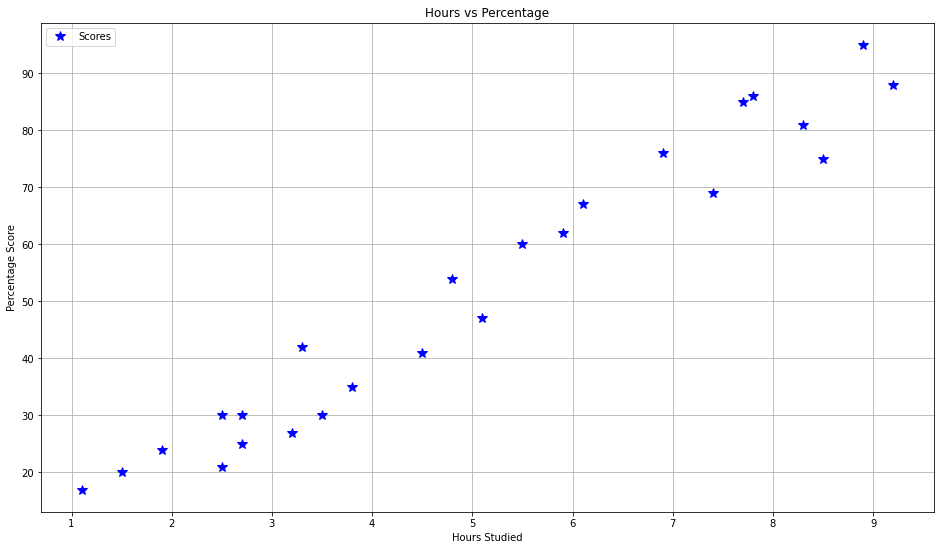

In [9]:
#plotting the dataset
plt.rcParams["figure.figsize"]=[16,9]
data.plot(x='Hours',y='Scores',style='*',color='blue',markersize=10)
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

#### From the graph above, we can observe that there is linear relationship between "Hours studied" and "Percentage score". So, we can use the linear regression supervied machine model on it to predict further values.

In [10]:
#we can also use  .corr to determine the corelation between variables
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [11]:
data.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [12]:
data.corr(method='spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


## Step 3:Data preparation

In this step we will divide the data into "features" (inputs) and "labels" (outputs). After that we will split the whole dataset into 2 parts-testing data and training data.

In [13]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [14]:
#using iloc function we will divide the data
x=data.iloc[:, :-1].values
y=data.iloc[:,1].values

In [15]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [16]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [17]:
#splitting data into traing and testing data
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=50)

## Step 4:Training the algorithm

we have splited our data into training and testing sets, and now we will train our Model.

In [18]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

## Step 5:Visualizing the model

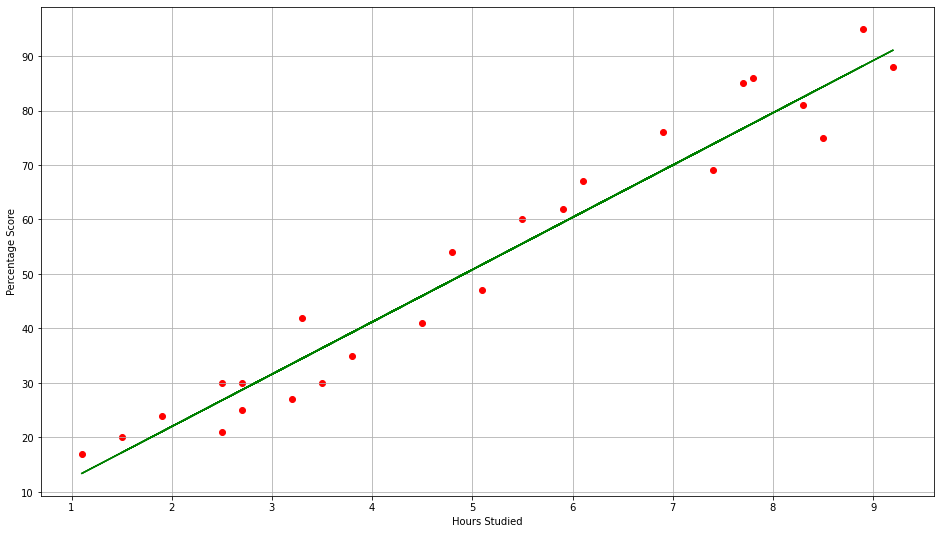

In [19]:
m=reg.coef_
c=reg.intercept_
line=m*x+c
plt.scatter(x,y,color='red')
plt.plot(x,line,color='green')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

## Step 6:Marking Predictions

Now that we have trained our algorithm, it's time to make some predictions.

In [20]:
print(x_test) # Testing data - In Hours
y_pred=reg.predict(x_test) # Predicting the scores

[[8.9]
 [2.7]
 [6.9]
 [3.8]
 [1.1]]


In [21]:
# comparing Actual vs Predicted

y_test

array([95, 30, 76, 35, 17], dtype=int64)

In [22]:
y_pred

array([88.21139357, 28.71845267, 69.02012231, 39.27365186, 13.36543566])

In [23]:
# Comparing Actual vs Predicted
actual_predicted=pd.DataFrame({'Target':y_test,'Predicted':y_pred})
actual_predicted

,Target,Predicted
0,95,88.211394
1,30,28.718453
2,76,69.020122
3,35,39.273652
4,17,13.365436


### What would be the predicted score if a student studied for 9.25 Hours/Day?

In [24]:
# Testing with your own data

h=9.25
s=reg.predict([[h]])
print("If student studied for {} hours per day he/she will score {} % in exam.".format(h,s))

If student studied for 9.25 hours per day he/she will score [91.56986604] % in exam.


Hence, it can be concluded that the predicted score if a student studies for 9.25 hours is 91.56986604.

## Step 7:Evaluating the model 

In the last step, we are going to evaluate our trained model by calculating mean absolute error.

In [25]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('R2 Score:',r2_score(y_test,y_pred))

Mean Absolute Error: 4.5916495300630285
R2 Score: 0.971014141329942
